MobileNetV2 Trained Model

In [1]:
# STEP 1: Import packages and mount Google Drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish, relu, softmax
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Dataset structure path and training settings
base_dir = "/content/drive/MyDrive/Pneumonia Disease Detection Dataset"
train_dir = os.path.join(base_dir, "Training Data")
val_dir = os.path.join(base_dir, "Validation Data")
test_dir = os.path.join(base_dir, "Testing Data")

# Image and training settings
img_size = (128, 128)
batch_size = 32
epochs = 25

# Create image generators for training, validation, and testing
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=True)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=False)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=img_size, color_mode='rgb',
    batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 3477 images belonging to 3 classes.
Found 498 images belonging to 3 classes.
Found 993 images belonging to 3 classes.


In [3]:
# STEP 3: Create MobileNetV2 model architecture
print("🚀 Creating new MobileNetV2 model...")
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = Activation(swish)(x)
x = Dense(128)(x)
x = Activation(relu)(x)
x = Dropout(0.3)(x)
output = Dense(3, activation=softmax)(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ModelCheckpoint callback to save best model based on validation accuracy
checkpoint_path = "/content/drive/MyDrive/Best MobileNetV2 Trained Model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)


🚀 Creating new MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,619,203 (9.99 MB)

 Trainable params: 361,219 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# STEP 4: Train the model with checkpoint callback
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[checkpoint]
)

# Save final trained model only (for future reference)
model.save("/content/drive/MyDrive/MobileNetV2 Trained Model.h5")
print("✅ Final model saved as MobileNetV2 Trained Model.h5")


Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9453 - loss: 0.1559
Epoch 1: val_accuracy improved from 0.83735 to 0.84538, saving model to /content/drive/MyDrive/Best MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 40s 363ms/step - accuracy: 0.9453 - loss: 0.1559 - val_accuracy: 0.8454 - val_loss: 0.4378
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9573 - loss: 0.1439
Epoch 2: val_accuracy did not improve from 0.84538
109/109 ━━━━━━━━━━━━━━━━━━━━ 40s 355ms/step - accuracy: 0.9573 - loss: 0.1440 - val_accuracy: 0.8454 - val_loss: 0.4916
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9572 - loss: 0.1497
Epoch 3: val_accuracy did not improve from 0.84538
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 352ms/step - accuracy: 0.9572 - loss: 0.1497 - val_accuracy: 0.8353 - val_loss: 0.4395
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9524 - loss: 0.1421
Epoch 4: val_accuracy did not improve from 0.84538
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.9524 - loss: 0.1421 - val_accuracy: 0.8454 - val_loss: 0.4137
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9659 - loss: 0.1234
Epoch 5: val_ac

109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 360ms/step - accuracy: 0.9593 - loss: 0.1244 - val_accuracy: 0.8474 - val_loss: 0.4467
Epoch 7/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9677 - loss: 0.1091
Epoch 7: val_accuracy improved from 0.84739 to 0.85341, saving model to /content/drive/MyDrive/Best MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 361ms/step - accuracy: 0.9677 - loss: 0.1091 - val_accuracy: 0.8534 - val_loss: 0.4165
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9681 - loss: 0.1013
Epoch 8: val_accuracy did not improve from 0.85341
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 358ms/step - accuracy: 0.9681 - loss: 0.1014 - val_accuracy: 0.8474 - val_loss: 0.4566
Epoch 9/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9773 - loss: 0.0924
Epoch 9: val_accuracy improved from 0.85341 to 0.85542, saving model to /content/drive/MyDrive/Best MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 356ms/step - accuracy: 0.9772 - loss: 0.0925 - val_accuracy: 0.8554 - val_loss: 0.4482
Epoch 10/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9733 - loss: 0.0915
Epoch 10: val_accuracy did not improve from 0.85542
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 354ms/step - accuracy: 0.9733 - loss: 0.0915 - val_accuracy: 0.8554 - val_loss: 0.4413
Epoch 11/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9774 - loss: 0.0843
Epoch 11: val_accuracy improved from 0.85542 to 0.85743, saving model to /content/drive/MyDrive/Best MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 359ms/step - accuracy: 0.9774 - loss: 0.0843 - val_accuracy: 0.8574 - val_loss: 0.4988
Epoch 12/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.9809 - loss: 0.0829
Epoch 12: val_accuracy did not improve from 0.85743
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 354ms/step - accuracy: 0.9808 - loss: 0.0829 - val_accuracy: 0.8554 - val_loss: 0.4696
Epoch 13/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9805 - loss: 0.0710
Epoch 13: val_accuracy improved from 0.85743 to 0.86345, saving model to /content/drive/MyDrive/Best MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 356ms/step - accuracy: 0.9805 - loss: 0.0710 - val_accuracy: 0.8635 - val_loss: 0.4750
Epoch 14/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9793 - loss: 0.0772
Epoch 14: val_accuracy did not improve from 0.86345
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 354ms/step - accuracy: 0.9793 - loss: 0.0772 - val_accuracy: 0.8494 - val_loss: 0.4699
Epoch 15/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9835 - loss: 0.0720
Epoch 15: val_accuracy did not improve from 0.86345
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 349ms/step - accuracy: 0.9835 - loss: 0.0720 - val_accuracy: 0.8534 - val_loss: 0.4831
Epoch 16/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9854 - loss: 0.0634
Epoch 16: val_accuracy did not improve from 0.86345
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.9854 - loss: 0.0634 - val_accuracy: 0.8534 - val_loss: 0.5325
Epoch 17/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9889 - loss: 0.0579
Epoch 17

109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 358ms/step - accuracy: 0.9913 - loss: 0.0515 - val_accuracy: 0.8675 - val_loss: 0.4886
Epoch 20/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9915 - loss: 0.0443
Epoch 20: val_accuracy did not improve from 0.86747
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 352ms/step - accuracy: 0.9915 - loss: 0.0443 - val_accuracy: 0.8554 - val_loss: 0.4725
Epoch 21/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9891 - loss: 0.0527
Epoch 21: val_accuracy did not improve from 0.86747
109/109 ━━━━━━━━━━━━━━━━━━━━ 42s 390ms/step - accuracy: 0.9891 - loss: 0.0526 - val_accuracy: 0.8554 - val_loss: 0.5185
Epoch 22/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9904 - loss: 0.0454
Epoch 22: val_accuracy improved from 0.86747 to 0.87149, saving model to /content/drive/MyDrive/Best MobileNetV2 Trained Model.h5


109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 359ms/step - accuracy: 0.9904 - loss: 0.0454 - val_accuracy: 0.8715 - val_loss: 0.5110
Epoch 23/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9942 - loss: 0.0387
Epoch 23: val_accuracy did not improve from 0.87149
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 355ms/step - accuracy: 0.9942 - loss: 0.0387 - val_accuracy: 0.8635 - val_loss: 0.5241
Epoch 24/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9944 - loss: 0.0348
Epoch 24: val_accuracy did not improve from 0.87149
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 352ms/step - accuracy: 0.9944 - loss: 0.0349 - val_accuracy: 0.8614 - val_loss: 0.5476
Epoch 25/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9964 - loss: 0.0326
Epoch 25: val_accuracy did not improve from 0.87149
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 351ms/step - accuracy: 0.9964 - loss: 0.0326 - val_accuracy: 0.8594 - val_loss: 0.5638


✅ Final model saved as MobileNetV2 Trained Model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.8393 - loss: 0.5502

✅ Test Accuracy: 84.89%
✅ Test Loss: 0.6085


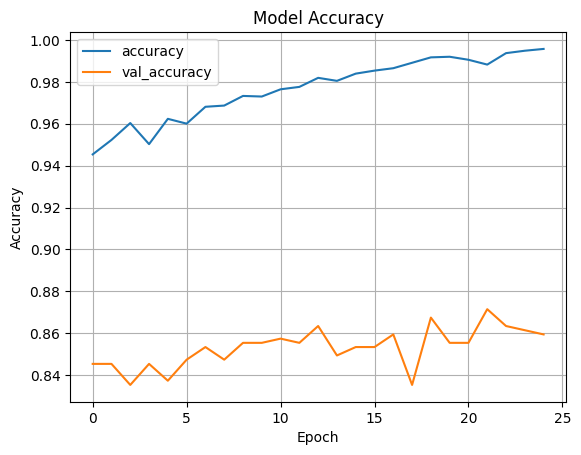

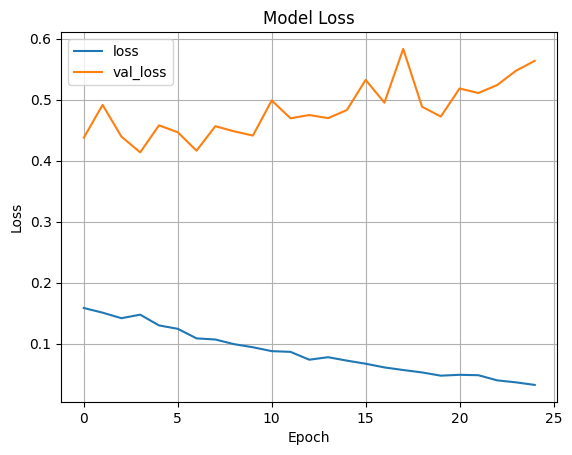

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step

📑 Classification Report:
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.80      0.79      0.79       331
             Normal       0.89      0.98      0.94       331
    Viral Pneumonia       0.85      0.77      0.81       331

           accuracy                           0.85       993
          macro avg       0.85      0.85      0.85       993
       weighted avg       0.85      0.85      0.85       993


✅ Weighted F1 Score: 0.8467
✅ Weighted Recall: 0.8489
✅ Weighted Precision: 0.8471


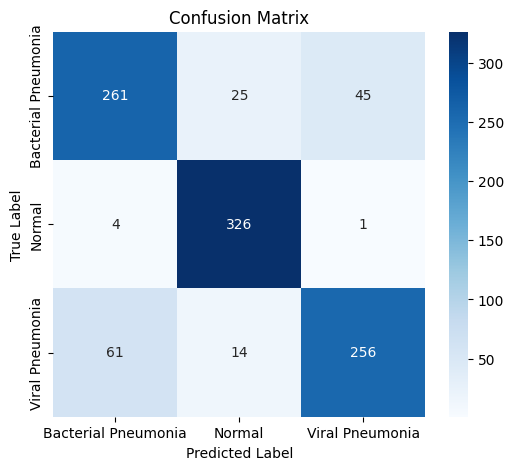

In [8]:
# STEP 5: Evaluate model performance on the test set
loss, accuracy = model.evaluate(test_gen)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")
print(f"✅ Test Loss: {loss:.4f}")

# Plot accuracy and loss trends during training
metrics = pd.DataFrame(history.history)

# Accuracy plot
metrics[['accuracy', 'val_accuracy']].plot(title="Model Accuracy", grid=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss plot
metrics[['loss', 'val_loss']].plot(title="Model Loss", grid=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# STEP 5.1: Generate predictions for the test set
y_true = test_gen.classes
y_pred_probabilities = model.predict(test_gen, verbose=1)
y_pred = np.argmax(y_pred_probabilities, axis=1)
class_labels = list(test_gen.class_indices.keys())

# STEP 5.2: Print classification report and calculate additional metrics
print("\n📑 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f"\n✅ Weighted F1 Score: {f1:.4f}")
print(f"✅ Weighted Recall: {recall:.4f}")
print(f"✅ Weighted Precision: {precision:.4f}")

# STEP 5.3: Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:
# STEP 6: Print and save final metrics summary
print("\n📊 Final Metrics Table:")
final_metrics = {
    "Dataset": ["Training", "Validation", "Test"],
    "Accuracy": [
        metrics['accuracy'].iloc[-1],
        metrics['val_accuracy'].iloc[-1],
        accuracy
    ],
    "Loss": [
        metrics['loss'].iloc[-1],
        metrics['val_loss'].iloc[-1],
        loss
    ],
    "F1 Score": ["-", "-", f1],
    "Recall": ["-", "-", recall],
    "Precision": ["-", "-", precision]
}
df_final = pd.DataFrame(final_metrics)
print(df_final.round(4))

# Save training history to a CSV file
metrics.to_csv("/content/drive/MyDrive/MobileNetV2 Training Model History.csv", index=False)
print("✅ History saved to MobileNetV2 Training Model History.csv")



📊 Final Metrics Table:
      Dataset  Accuracy    Loss  F1 Score    Recall Precision
0    Training    0.9957  0.0323         -         -         -
1  Validation    0.8594  0.5638         -         -         -
2        Test    0.8489  0.6085  0.846716  0.848943  0.847149
✅ History saved to MobileNetV2 Training Model History.csv
